Número de threads:3


analise de 250000 valores


Nº Execução | SpeedUp  | Qtde. Primos
Execução #0 | 1.047514 | 121299 - 121298
Execução #1 | 1.001659 | 121299 - 121298
Execução #2 | 0.955819 | 121299 - 121298
Execução #3 | 1.010176 | 121299 - 121298
Execução #4 | 1.041600 | 121299 - 121298
Execução #5 | 0.971345 | 121299 - 121298
Execução #6 | 0.991071 | 121299 - 121298
Execução #7 | 1.073062 | 121299 - 121298
Execução #8 | 1.010793 | 121299 - 121298
Execução #9 | 0.973130 | 121299 - 121298
Execução #10 | 1.003593 | 121299 - 121298
Execução #11 | 1.054092 | 121299 - 121298
Execução #12 | 0.896051 | 121299 - 121298
Execução #13 | 0.986896 | 121299 - 121298
Execução #14 | 1.058183 | 121299 - 121298
Execução #15 | 1.035883 | 121299 - 121298
Execução #16 | 1.194749 | 121299 - 121298
Execução #17 | 1.010943 | 121299 - 121298
Execução #18 | 1.046631 | 121299 - 121298
Execução #19 | 0.935534 | 121299 - 121298
Execução #20 | 0.940763 | 121299 - 121298
Execução #21 | 1.006093 | 121299 - 12129

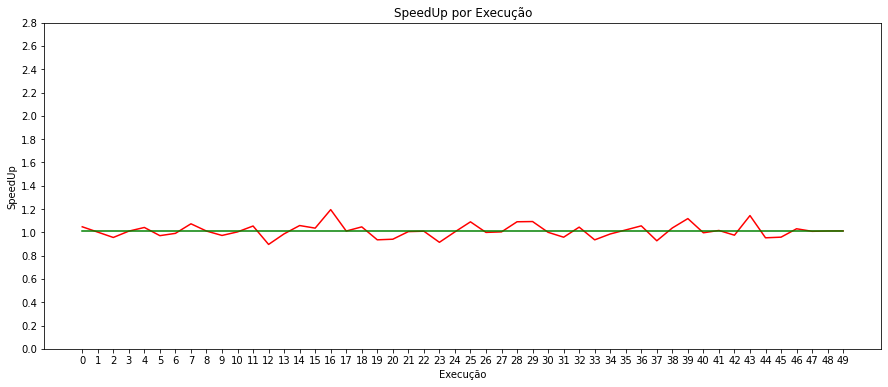

Nº Threads    | SpeedUp  | Qtde. Primos
Nº Threads #1 | 1.010324 | 121299 - 121299
Nº Threads #1 | 0.911324 | 121299 - 121299
Nº Threads #1 | 0.907400 | 121299 - 121299
Nº Threads #1 | 1.026029 | 121299 - 121299
Nº Threads #1 | 1.002561 | 121299 - 121299
Nº Threads #11 | 0.973188 | 121299 - 121296
Nº Threads #11 | 1.001088 | 121299 - 121296
Nº Threads #11 | 1.068166 | 121299 - 121296
Nº Threads #11 | 1.016116 | 121299 - 121296
Nº Threads #11 | 1.007520 | 121299 - 121296
Nº Threads #21 | 1.025025 | 121299 - 121283
Nº Threads #21 | 1.019614 | 121299 - 121283
Nº Threads #21 | 0.975752 | 121299 - 121283
Nº Threads #21 | 0.996280 | 121299 - 121283
Nº Threads #21 | 1.047972 | 121299 - 121283
Nº Threads #31 | 1.002552 | 121299 - 121283
Nº Threads #31 | 1.015659 | 121299 - 121283
Nº Threads #31 | 1.032387 | 121299 - 121283
Nº Threads #31 | 1.008186 | 121299 - 121283
Nº Threads #31 | 0.967646 | 121299 - 121283
Nº Threads #41 | 0.992195 | 121299 - 121276
Nº Threads #41 | 1.074961 | 121299 - 1212

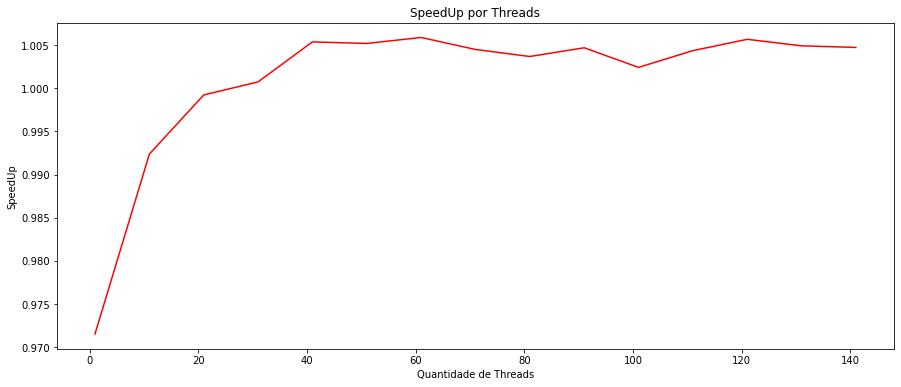

In [1]:
from time import perf_counter_ns
import simples as sp
import mtrhead as mt
import matplotlib.pyplot as plt
import numpy as np

with open("data.csv") as file:
    data = [line.strip() for line in file]

data = list(map(int, data))
qtde = int(input('Número de threads:'))

print('\n\nanalise de %d valores\n\n'%(len(data)))

################################################# Várias Execuções com mesmo Número de Threads
count = 0
ne = 50

list_speedup = []
list_count = []
list_media = []

print('Nº Execução | SpeedUp  | Qtde. Primos')

while count < ne:
    
    start1 = perf_counter_ns()
    primo_sp = sp.resolve_simples(data)
    finish1 = perf_counter_ns()

    start2 = perf_counter_ns()
    primo_mt = mt.resolve_trhread(data, qtde)
    finish2 = perf_counter_ns()

    #print('simples          > threads')
    #print('%f ms   > %f ms  : tempo execucao'%((finish1-start1)/1000000,(finish2-start2)/1000000))
    #print('%d            > %d           :numeros primos encontrados'%(primo_sp,primo_mt))
    #print('SpeedUp  = %f '%(((finish1-start1)/1000000)/((finish2-start2)/1000000)))
    print('Execução #%d | %f | %d - %d' %(count, ((finish1-start1)/1000000)/((finish2-start2)/1000000), primo_sp, primo_mt))
    #print('====================================================================')
    
    list_speedup.append(((finish1-start1)/1000000)/((finish2-start2)/1000000))
    list_count.append(count)
    
    count += 1
    
soma_speedup = sum(list_speedup)
qtde_speedup = len(list_speedup)
media_speedup = soma_speedup/qtde_speedup

count1 = 0
while count1 < ne:
    list_media.append(media_speedup)
    count1 += 1

plt.figure(figsize=(15,6))    
plt.plot(list_count, list_speedup, color='r')
plt.plot(list_count, list_media, color='g')
plt.ylabel('SpeedUp')
plt.xlabel('Execução')
listY = np.arange(0, 3, 0.2)
listX = np.arange(0, 50, 1)
plt.xticks(listX)
plt.yticks(listY)
plt.title("SpeedUp por Execução")
plt.show()

################################################################## Várias Execuções com Varicação de Threads

list_speedup = []
list_threads = []
valores_50x = []
qtde = 1
nt = 151

print('Nº Threads    | SpeedUp  | Qtde. Primos')

while qtde < nt:
    count = 0
    while count < 5:
        start1 = perf_counter_ns()
        primo_sp = sp.resolve_simples(data)
        finish1 = perf_counter_ns()

        start2 = perf_counter_ns()
        primo_mt = mt.resolve_trhread(data, qtde)
        finish2 = perf_counter_ns()

        #print('simples          > threads')
        #print('%f ms   > %f ms  : tempo execucao'%((finish1-start1)/1000000,(finish2-start2)/1000000))
        #print('%d            > %d           :numeros primos encontrados'%(primo_sp,primo_mt))
        #print('SpeedUp  = %f '%(((finish1-start1)/1000000)/((finish2-start2)/1000000)))
        print('Nº Threads #%d | %f | %d - %d' %(qtde, ((finish1-start1)/1000000)/((finish2-start2)/1000000), primo_sp, primo_mt))
        #print('====================================================================')
        
        valores_50x.append(((finish1-start1)/1000000)/((finish2-start2)/1000000))
        count += 1
        
    soma_valores = sum(valores_50x)
    qtde_valores = len(valores_50x)
    media_valores = soma_valores/qtde_valores
    list_speedup.append(media_valores)
    list_threads.append(qtde)
    
    qtde += 10
    
    
plt.figure(figsize=(15,6))       
plt.plot(list_threads, list_speedup, color='r')
plt.ylabel('SpeedUp')
plt.xlabel('Quantidade de Threads')
plt.title("SpeedUp por Threads")
plt.show()

